## Метод Монте-Карло

### №1 
Из колоды карт (52 листа) наудачу вынимаются три карты.
Найти вероятность того, что:

а) среди них окажется ровно один туз;

б) среди них окажется хотя бы один туз;

в) это будут тройка, семерка и туз (в любом порядке)

----

#### Теоретическое решение

а) 

Сколькими способами можно выбрать 3 элемента из 52:

$$C_{52}^3 = \frac{52!}{3!49!} = 22100$$

Среди них будет ровно 1 туз = $4\cdot C_{48}^2 = 4512$

$$ \boxed{P(1 ace) = \frac{4512}{22100}  \approx 0.204 } $$


б) Кол-во исходов где хотя бы 1 туз(1 туз + 2 туза + 3 туза)

$$ \#1туз = 4\cdot C_{48}^2 = 4512; \ \ \#2туза = C_4^2 \cdot 48 = 288; \ \ \#3туза = C_4^3 = 45 $$

Итого:
$$ \boxed{ P(at least 1 ace) = \frac{4512+288+4}{22100} \approx 0.217 }  $$


в)

Кол-во исходов где выпадает тройка семёрка и туз:

$$ \# = 4\cdot 4 \cdot 4 = 64 $$

Итого:

$$ \boxed{ P = \frac{64}{22100} \approx 0.0029  } $$


----


#### Решение методом Монте-Карло



In [31]:
# a
from random import sample # выбор k элементов без возвращения

deck = ['a'] * 40 + ['3'] * 4 + ['7'] * 4 + ['ace'] * 4

n = 100000
successes = 0

for j in range(n):
    sample_ = sample(deck, k=3)

    if sample_.count('ace') == 1:
        successes += 1

print(successes/n)

0.20507


In [34]:
# b
from random import sample # выбор k элементов без возвращения

deck = ['a'] * 40 + ['3'] * 4 + ['7'] * 4 + ['ace'] * 4

n = 100000
successes = 0

for j in range(n):
    sample_ = sample(deck, k=3)

    if sample_.count('ace') >= 1:
        successes += 1

print(successes/n)

0.21726


In [30]:
# c
from random import sample # выбор k элементов без возвращения

deck = ['a'] * 40 + ['3'] * 4 + ['7'] * 4 + ['ace'] * 4

n = 100000
successes = 0

for j in range(n):
    sample_ = sample(deck, k=3)

    if sample_.count('ace') == 1 and sample_.count('3') == 1 and sample_.count('7') == 1:
        successes += 1

print(successes/n)

0.00295


### №2 
Ящик содержит 90 годных и 10 дефектных шурупов. С какой
вероятностью среди десяти наудачу взятых шурупов нет дефектных?

----

#### Теоретическое решение

Кол-во способов выбрать 10 из 100:

$$ C_{100}^{10} = \frac{100!}{10!90!}  $$

Кол-во способов взять 10 не дефектных:

$$ \# = C_{90}^{10} = \frac{90!}{10!80!}  $$

Итого:

$$ \boxed{ P = \frac{C_{90}^{10}}{ C_{100}^{10} } \approx 0.33  } $$

----

#### Решение методом Монте-Карло

In [37]:
from random import sample

box = ['good'] * 90 + ['bad'] * 10

n = 100000
successes = 0 


for j in range(n):
    samples_ = sample(box, k=10)

    if samples_.count('bad') == 0:
        successes += 1

print(successes/n)

0.3292


### №3
Стержень длины l разломан в двух наудачу выбранных точках. С какой вероятностью из полученных отрезков можно составить
треугольник?


----

### Теоретическое решение

Обе точки выбираются случайно на отрезке от 0 до l $\ \Rightarrow \  $ имеет квадрат со стороной l - множество всех исходов.

Благоприятными являются исходы, при которых выполняется неравенство треугольника:

$$ x < y + z $$

Пусть точки обозначаются $x_1, x_2$:

- Длина первого отрезка = $\min(x_1, x_2)$
- Длина второго отрезка = $\max(x_1, x_2) - \min(x_1, x_2) = |x_1 - x_2|$
- Длина третьего отрезка = $ l - \max(x_1, x_2) $

Применяя неравенство треугольника получаем:

$$ \begin{cases} 
    \min < l/2 \\
    \max > l/2 \\
    \max < \min + l/2
\end{cases} $$

Геометрически это выглядит так:

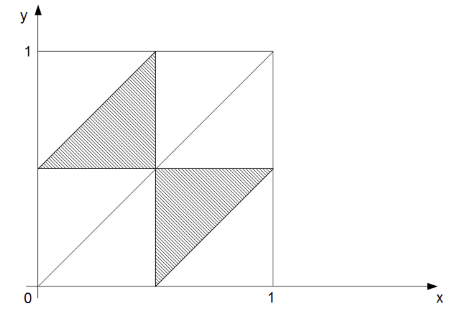

Итого:

$$ \boxed{P = \frac14} $$

----

#### Решение методом Монте-Карло

In [58]:
from random import random

n = 100000
successes = 0


for j in range(n):
    x1 = random()
    x2 = random()

    x = min(x1, x2)
    y = max(x1, x2) - min(x1, x2)
    z = 1 - max(x1, x2)

    if x < y+z and y < x+z and z < x+y:
        successes += 1

print(successes/n)

0.25291
